# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf  #For getting real time TCS stock-price data
#For getting current date-time details
from time import time 
import datetime
from statsmodels.tsa.stattools import adfuller #For performing Dickey-Fuller-Test
#For Auto-Correlation and Partial-Auto-Correlation
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#For Model Building
from statsmodels.tsa.arima.model import ARIMA
#For data visulization
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Importing Data  and Exploratory Data Analysis[EDA]

In [2]:
#importing TCS[TATA CONSULTANCY SERVICES] stock data from NATIONAL STOCK EXCHANGE[NS]
ticker="TCS.NS"
data=yf.Ticker(ticker)

In [3]:
#Getting Todays' date as "end date"
end_date=datetime.date.today()
end_date

datetime.date(2024, 6, 8)

In [4]:
#Getting 2-years past date as "start date"
start_date=end_date-datetime.timedelta(days=730)
start_date

datetime.date(2022, 6, 9)

In [5]:
#Getting tomorrow's date
tomorrow_date=end_date+datetime.timedelta(days=1)
tomorrow_date

datetime.date(2024, 6, 9)

In [6]:
#Collecting TCS stock prices from "start date" to "end date" 
prices=data.history(start=start_date,end=end_date).Close
prices

Date
2022-06-09 00:00:00+05:30    3260.836670
2022-06-10 00:00:00+05:30    3196.896240
2022-06-13 00:00:00+05:30    3063.403320
2022-06-14 00:00:00+05:30    3054.791992
2022-06-15 00:00:00+05:30    3050.748291
                                ...     
2024-06-03 00:00:00+05:30    3702.850098
2024-06-04 00:00:00+05:30    3715.000000
2024-06-05 00:00:00+05:30    3746.449951
2024-06-06 00:00:00+05:30    3830.399902
2024-06-07 00:00:00+05:30    3893.949951
Name: Close, Length: 492, dtype: float64

In [7]:
prices_df=pd.DataFrame(prices)
prices_df.columns=['prices']
prices_df

,prices
Date,
2022-06-09 00:00:00+05:30,3260.836670
2022-06-10 00:00:00+05:30,3196.896240
2022-06-13 00:00:00+05:30,3063.403320
2022-06-14 00:00:00+05:30,3054.791992
2022-06-15 00:00:00+05:30,3050.748291
...,...
2024-06-03 00:00:00+05:30,3702.850098
2024-06-04 00:00:00+05:30,3715.000000
2024-06-05 00:00:00+05:30,3746.449951


In [8]:
#Calculating the Returns from the Stock Prices
returns=prices.pct_change().dropna()
returns_df=pd.DataFrame(returns)
returns_df.columns=['returns']
returns_df

,returns
Date,
2022-06-10 00:00:00+05:30,-0.019609
2022-06-13 00:00:00+05:30,-0.041757
2022-06-14 00:00:00+05:30,-0.002811
2022-06-15 00:00:00+05:30,-0.001324
2022-06-16 00:00:00+05:30,-0.020054
...,...
2024-06-03 00:00:00+05:30,0.008690
2024-06-04 00:00:00+05:30,0.003281
2024-06-05 00:00:00+05:30,0.008466


In [9]:
# DICKEY FULLER TEST FUNCTION
def af_test(prices):
    result=adfuller(prices)
    labels=['AD TEST STATISTICS','p-value','Lags Used','No.Of.Observations Used']
    for i,j in zip(result,labels):
        print(j+" : "+str(i))
    if(result[1]>0.05):
        print("DATA IS NOT STATIONARY")
    else:
        print("DATA IS STATIONARY")

In [10]:
af_test(prices_df['prices'])

AD TEST STATISTICS : -1.02506219447188
p-value : 0.7440140554919288
Lags Used : 0
No.Of.Observations Used : 491
DATA IS NOT STATIONARY


Text(0.5, 1.0, 'Time-Series plot for Prices')

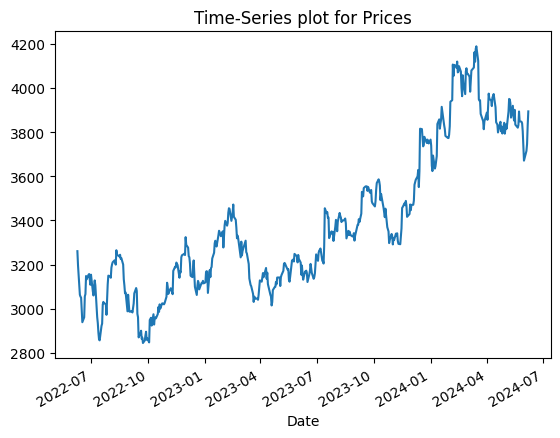

In [11]:
fig1=prices_df['prices'].plot()
fig1.set_title("Time-Series plot for Prices")

In [12]:
af_test(returns_df['returns'])

AD TEST STATISTICS : -21.684689394472407
p-value : 0.0
Lags Used : 0
No.Of.Observations Used : 490
DATA IS STATIONARY


Text(0.5, 1.0, 'Time-Series plot for Returns')

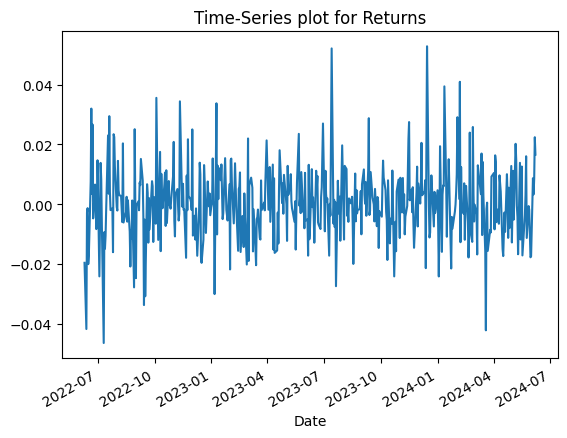

In [13]:
fig12=returns_df['returns'].plot()
fig12.set_title("Time-Series plot for Returns")

In [14]:
#Diferencing
prices_df['first difference']=prices_df['prices']-prices_df['prices'].shift(1)
prices_df

,prices,first difference
Date,,
2022-06-09 00:00:00+05:30,3260.836670,NaN
2022-06-10 00:00:00+05:30,3196.896240,-63.940430
2022-06-13 00:00:00+05:30,3063.403320,-133.492920
2022-06-14 00:00:00+05:30,3054.791992,-8.611328
2022-06-15 00:00:00+05:30,3050.748291,-4.043701
...,...,...
2024-06-03 00:00:00+05:30,3702.850098,31.900146
2024-06-04 00:00:00+05:30,3715.000000,12.149902
2024-06-05 00:00:00+05:30,3746.449951,31.449951


In [15]:
af_test(prices_df['first difference'].dropna())

AD TEST STATISTICS : -21.66024594788218
p-value : 0.0
Lags Used : 0
No.Of.Observations Used : 490
DATA IS STATIONARY


Text(0.5, 1.0, 'Time Series Plot after Differencing')

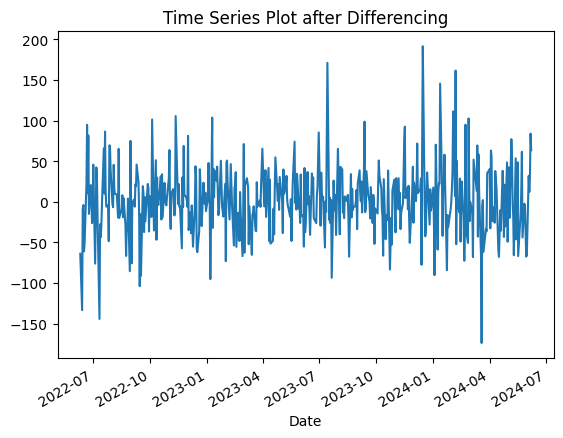

In [16]:
fig2=prices_df['first difference'].plot()
fig2.set_title("Time Series Plot after Differencing")

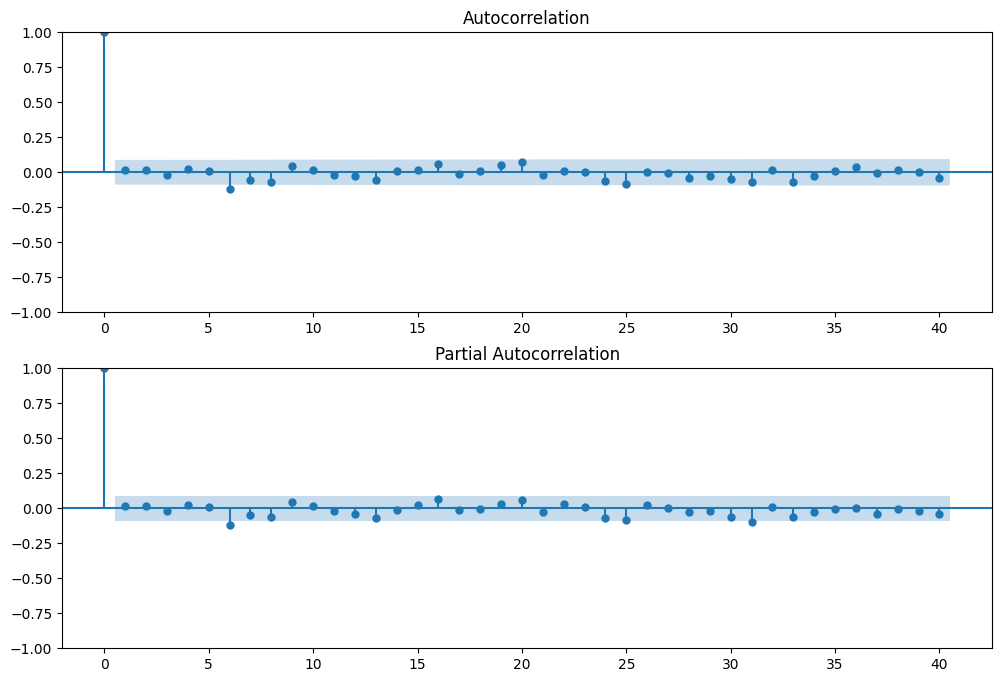

In [17]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(prices_df['first difference'].dropna(),lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(prices_df['first difference'].dropna(),lags=40,ax=ax2)

In [18]:
# ACF AND PACF DOES NOT HELP SIGNIFICANTLY IN CHOOSING BETWEEN AR AND MA Model
# SO WE ARE FINDING THE BEST p,d,q BY TRIAL AND ERROR 

# Building ARIMA [ Auto-Regressive Integerated Moving Average ] Model For Stock-Prices

In [19]:
model1=ARIMA(prices_df['prices'],order=(7,0,6))
model1_fit=model1.fit()
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 prices   No. Observations:                  492
Model:                 ARIMA(7, 0, 6)   Log Likelihood               -2536.608
Date:                Sat, 08 Jun 2024   AIC                           5103.215
Time:                        00:20:15   BIC                           5166.192
Sample:                             0   HQIC                          5127.944
                                - 492                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3377.7340    321.585     10.503      0.000    2747.439    4008.029
ar.L1          1.2897      0.312      4.138      0.000       0.679       1.901
ar.L2          0.0144      0.475      0.030      0.976      -0.916       0.945
ar.L3         -0.8901      0.520     -1.712      0.087      -1.909       0.129
ar.L4          0.5897      0.522      1.129      0.259      -0.434       1.613
ar.L5          0.4728      0.423      1.119      0.263      -0.356       1.301
ar.L6         -0.6202      0.493     -1.259      0.208      -1.586       0.345
ar.L7          0.1404      0.298      0.472      0.637      -0.443       0.724
ma.L1         -0.2806      0.311     -0.901      0.368      -0.891       0.330
ma.L2         -0.2921      0.309     -0.944      0.345      -0.898       0.314
ma.L3          0.5772      0.341      1.694      0.090      -0.091       1.245
ma.L4          0.0266      0.294      0.091      0.928      -0.549       0.602
ma.L5         -0.4888      0.293     -1.668      0.095      -1.063       0.086
ma.L6         -0.0042      0.320     -0.013      0.989      -0.631       0.623
sigma2      1736.3381     87.293     19.891      0.000    1565.247    1907.429
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               107.70
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.37   Skew:                             0.42
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
#Predicting stock prices for 200 days
prices_df['forecast']=model1_fit.predict(start=0,end=200,dynamic=False)
prices_df.head(135)

,prices,first difference,forecast
Date,,,
2022-06-09 00:00:00+05:30,3260.836670,NaN,3377.733979
2022-06-10 00:00:00+05:30,3196.896240,-63.940430,3261.693794
2022-06-13 00:00:00+05:30,3063.403320,-133.492920,3196.532970
2022-06-14 00:00:00+05:30,3054.791992,-8.611328,3061.168907
2022-06-15 00:00:00+05:30,3050.748291,-4.043701,3055.499994
...,...,...,...
2022-12-16 00:00:00+05:30,3099.189453,-62.026855,3167.703422
2022-12-19 00:00:00+05:30,3062.652588,-36.536865,3102.726269
2022-12-20 00:00:00+05:30,3102.728516,40.075928,3062.281673


<Axes: xlabel='Date'>

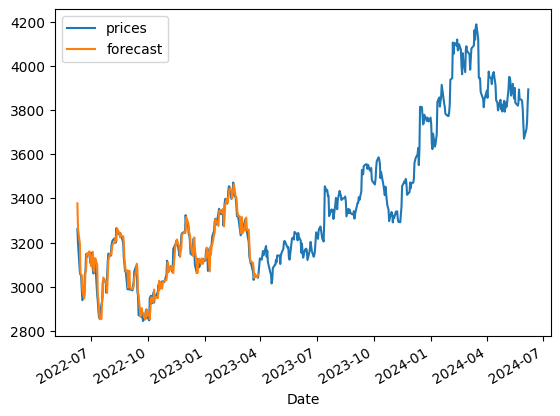

In [21]:
prices_df[['prices','forecast']].plot()

In [22]:
#THE MODEL WORKS PERFECTLY FINE

In [23]:
#PERFORMING THE FORECAST for the next day after "end-date"
next_days_price=model1_fit.forecast(100,alpha=0.01)
next_days_price.iloc[0]

3903.4265477727454

# Building SARIMAX [ Seasonal ARIMA with eXogenous factors ] Model For Returns

In [24]:
af_test(returns_df['returns'])

AD TEST STATISTICS : -21.684689394472407
p-value : 0.0
Lags Used : 0
No.Of.Observations Used : 490
DATA IS STATIONARY


In [25]:
# HERE WE CAN SEE THAT THE 'RETURNS' DATA IS STATIONARY
# Even if the data appears stationary visually, differencing might be a pre-processing step to ensure compatibility with the chosen model
# The chosen model here is SARIMAX

In [26]:
#TRYING TO PREDICT RETURNS PERCENTAGE USING SARIMAX
model2=sm.tsa.statespace.SARIMAX(returns_df['returns'],order=(1,2,1),seasonal_order=(1,2,1,24))
model2_fit=model2.fit()

In [27]:
#Predicting The returns for 400 days
returns_df['forecast']=model2_fit.predict(start=0,end=400,dynamic=False)
returns_df.head(135)

,returns,forecast
Date,,
2022-06-10 00:00:00+05:30,-0.019609,0.000000
2022-06-13 00:00:00+05:30,-0.041757,-0.034315
2022-06-14 00:00:00+05:30,-0.002811,-0.063905
2022-06-15 00:00:00+05:30,-0.001324,0.036135
2022-06-16 00:00:00+05:30,-0.020054,0.000164
...,...,...
2022-12-19 00:00:00+05:30,-0.011789,-0.019578
2022-12-20 00:00:00+05:30,0.013085,-0.020564
2022-12-21 00:00:00+05:30,0.007583,0.006620


<Axes: xlabel='Date'>

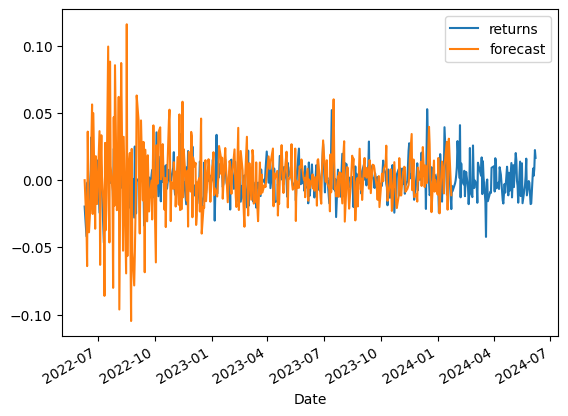

In [28]:
returns_df[['returns','forecast']].plot()

In [29]:
#PERFORMING THE FORECAST for the next day after "end-date"

In [30]:
next_days_returns=model2_fit.forecast(100,alpha=0.05)
next_days_returns.iloc[0]

0.03240945591160717

# Saving The ARIMA model For Instant Stock price Forecasting

In [31]:
import joblib
joblib.dump(model1_fit, 'stockmodel.joblib')

['stockmodel.joblib']